In [843]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler

In [844]:
cmap = "inferno"

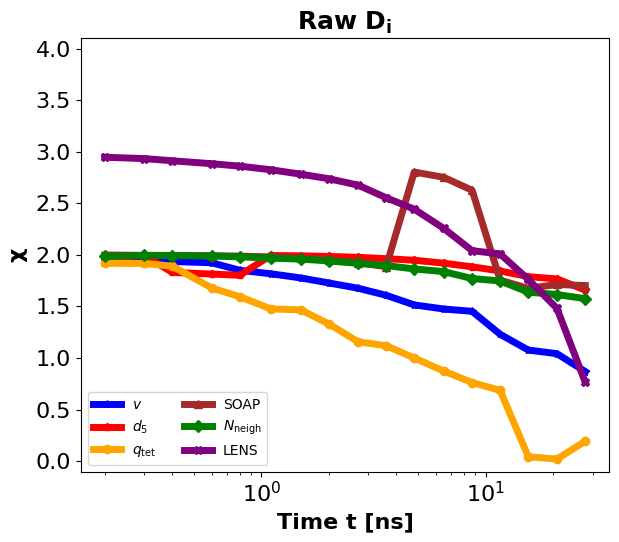

In [845]:
import os
import numpy as np
import matplotlib.pyplot as plt

win_arr = np.load("results/D_arrays/windows_list.npy")
win_arr = win_arr[:-2] / 10

for filename in os.listdir("results/D_arrays"):
    
    if filename.startswith("windows_list") or filename.startswith("sp"):
        continue

    if filename.startswith("sp_10_vel"):
        descriptor = r"v (sp. avg)"
        mark = "*"
        color = "blue"
    elif filename.startswith("vel"):
        descriptor = r"$v$"
        mark = "*"
        color = "blue"
    elif filename.startswith("dist_5"):
        descriptor = r"$d_5$"
        mark = "p"
        color = "red"
    elif filename.startswith("sp_10_SOAP_10_PC1"):
        descriptor = "SOAP (sp. avg)"
        mark = "^"
        color = "brown"
    elif filename.startswith("sp_10_LENS_10"):
        descriptor = "LENS (sp. avg)"
        mark = "X"
        color = "purple"
    elif filename.startswith("OTO"):
        descriptor = r"$q_{\text{tet}}$"
        mark = "o"
        color = "orange"
    elif filename.startswith("sp_10_nn_10"):
        descriptor = "NN (sp. avg)"
        mark = "D"
        color = "green"
    elif filename.startswith("sp_10_OTO"):
        descriptor = "OTO (sp. avg)"
        mark = "o"
        color = "orange"
    elif filename.startswith("SOAP_10_PC1"):
        descriptor = "SOAP"
        mark = "^"
        color = "brown"
    elif filename.startswith("sp_10_dist_5"):
        descriptor = "d5 (sp. avg)"
        mark = "p"
        color = "red"
    elif filename.startswith("nn_10"):
        descriptor = r"$N_{\text{neigh}}$"
        mark = "D"
        color = "green"
    elif filename.startswith("LENS_10"):
        descriptor = "LENS"
        mark = "X"
        color = "purple"

    D_arr = np.load(f"results/D_arrays/{filename}")
    D_arr = D_arr[:-2]
    
    plt.plot(win_arr, D_arr, label=descriptor, marker=mark, c=color)

# Titles and labels
plt.title(r"Raw $\mathbf{D_i}$", fontsize=18, fontweight='bold')
plt.ylabel(r"$\mathbf{\chi}$", fontsize=16, fontweight='bold')
plt.xlabel("Time t [ns]", fontsize=16, fontweight='bold')
plt.tick_params(labelsize=16)
plt.xscale("log")
plt.ylim(-0.1, 4.1)

# Legend positioned in the bottom-left corner inside the plot
plt.legend(loc='lower left', ncol=2)  # Adjust ncol as needed

plt.tight_layout(rect=[0, 0, 0.95, 1.15])
plt.show()


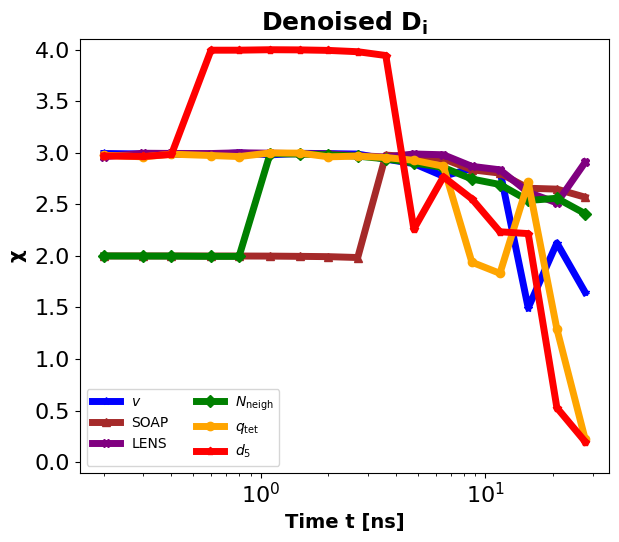

In [846]:
import os
import numpy as np
import matplotlib.pyplot as plt

win_arr = np.load("results/D_arrays/windows_list.npy")
win_arr = win_arr[:-2] / 10

for filename in os.listdir("results/D_arrays"):
    
    if(filename.startswith("windows_list")):
        continue
    if(not filename.startswith("sp")):
        continue

    if(filename.startswith("sp_10_vel")):
        descriptor = r"$v$"
        mark = "*"
        color = "blue"
    elif filename.startswith("vel"):
        descriptor = r"$v$"
        mark = "*"
        color = "blue"
    elif filename.startswith("dist_5"):
        descriptor = r"$d_5$"
        mark = "p"
        color = "red"
    elif filename.startswith("sp_10_SOAP_10_PC1"):
        descriptor = "SOAP"
        mark = "^"
        color = "brown"
    elif filename.startswith("sp_10_LENS_10"):
        descriptor = "LENS"
        mark = "X"
        color = "purple"
    elif filename.startswith("OTO"):
        descriptor = r"$q_{\text{tet}}$"
        mark = "o"
        color = "orange"
    elif filename.startswith("sp_10_nn_10"):
        descriptor = r"$N_{\text{neigh}}$"
        mark = "D"
        color = "green"
    elif filename.startswith("sp_10_OTO"):
        descriptor = r"$q_{\text{tet}}$"
        mark = "o"
        color = "orange"
    elif filename.startswith("SOAP_10_PC1"):
        descriptor = "SOAP"
        mark = "^"
        color = "brown"
    elif filename.startswith("sp_10_dist_5"):
        descriptor = r"$d_5$"
        mark = "p"
        color = "red"
    elif filename.startswith("nn_10"):
        descriptor = r"$N_{\text{neigh}}$"
        mark = "D"
        color = "green"
    elif filename.startswith("LENS_10"):
        descriptor = "LENS"
        mark = "X"
        color = "purple"

    D_arr = np.load(f"results/D_arrays/{filename}")
    D_arr = D_arr[:-2]
    
    #marker = markers.get(descriptor, 'o')  # Usa 'o' come default se il descrittore non è nella mappa
    plt.plot(win_arr, D_arr, label=descriptor, marker=mark,c=color)

plt.title(r"Denoised $\mathbf{D_i}$", fontsize=18, fontweight='bold')
plt.ylabel("Descriptor efficiency", fontsize=12, fontweight='bold')
plt.xlabel("Time t [ns]", fontsize=14, fontweight='bold')
plt.tick_params(labelsize=16)
plt.xscale("log")
plt.ylabel(r"$\mathbf{\chi}$",  fontsize=14,fontweight='bold')

#plt.gca().set_yticklabels([])
plt.legend(loc="lower left", ncol=2)
plt.ylim(-0.1,4.1)
plt.tight_layout(rect=[0, 0, 0.95, 1.15])
plt.show()

# Data scraping

In [847]:

original_dataset = pd.DataFrame()
win_arr = np.load("results/D_arrays/windows_list.npy")
win_arr = win_arr[:-2]
for filename in os.listdir("results/D_arrays"):
    spatial_flag = False
    #reading and cut time resolutions (frame)
    if(filename.startswith("windows_list")):
        continue

    #reading and cut states
    st_arr = np.load(f"results/ST_arrays/{filename}")
    st_arr = st_arr[:-2]

    #reading and cut env0
    env_arr = np.load(f"results/ENV_arrays/{filename}")
    env_arr = env_arr[:-2]

    a = -1
    for i in range(len(env_arr)):
        if(env_arr[i] <= 0.5):
            a += 1
    env_thr = win_arr[a]

    #reading and cut D
    D_arr = np.load(f"results/D_arrays/{filename}")
    D_arr = D_arr[:-2]

    #states mode and counting
    st_mode = stats.mode(st_arr)
    st_max = np.max(st_arr)

    count_0 = np.sum(st_arr == 0)
    count_1 = np.sum(st_arr == 1)
    count_2 = np.sum(st_arr == 2)
    count_3 = np.sum(st_arr == 3)
    count_4 = np.sum(st_arr == 4)

    #mean env0 and std
    env_mean = np.mean(env_arr)
    env_std = np.std(env_arr) 
    #D max
    D_max = np.max(D_arr)
    D_mean = np.mean(D_arr)

    if(filename.startswith("sp_10_vel")):
        descriptor = r"$\mathbf{\langle \mathbf{v} \rangle}$"
    elif filename.startswith("vel"):
        descriptor = r"$\mathbf{v}$"
    elif filename.startswith("dist_5"):
        descriptor = r"$\mathbf{d_5}$"
    elif filename.startswith("sp_10_SOAP_10_PC1"):
        descriptor = r"$\mathbf{\langle SOAP \rangle}$"
    elif filename.startswith("sp_10_LENS_10"):
        descriptor = r"$\mathbf{\langle LENS \rangle}$"
    elif filename.startswith("OTO"):
        descriptor = r"$\mathbf{q_\text{tet}}$"
    elif filename.startswith("sp_10_nn_10"):
        descriptor = r"$\mathbf{\langle N_{\text{neigh}} \rangle}$"
    elif filename.startswith("sp_10_OTO"):
        descriptor = r"$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$"
    elif filename.startswith("SOAP_10_PC1"):
        descriptor = "SOAP"
    elif filename.startswith("sp_10_dist_5"):
        descriptor = r"$\mathbf{\langle d_5 \rangle}$"
    elif filename.startswith("nn_10"):
        descriptor = r"$\mathbf{N_{\text{neigh}}}$"
    elif filename.startswith("LENS_10"):
        descriptor = "LENS"

    new_row = pd.DataFrame([{
        'Descriptors': descriptor,
        'State_mode': st_mode[0],
        #'State_max': st_max,
        #'State_count': st_mode[1],
        'count_0': count_0,
        'count_1': count_1,
        'count_2': count_2,
        'count_3': count_3,
        'count_4': count_4,
        'Env_mean': env_mean,
        'Env_std': env_std,
        'D_max': D_max,
        'D_mean':D_mean,
        'thr': env_thr
        }])
    original_dataset = pd.concat([original_dataset, new_row], ignore_index=True)
original_dataset = original_dataset.set_index("Descriptors")

In [848]:
manual_data_timerange = {
    'sp_10_vel': 116-2,
    'vel': 87-2,
    'dist_5': 278 - 2,
    'sp_10_SOAP_10_PC1':278-36,
    'sp_10_LENS_10':65-2,
    'OTO':4-2,
    'sp_10_nn_10':278-11,
    'sp_10_OTO':65-2,
    'SOAP_10_PC1':87-48,
    'sp_10_dist_5':36-6,
    'nn_10':278-2,
    'LENS_10':65-2
}

# Converte il dizionario in una Serie e assegna alla nuova colonna del DataFrame
#dataset['Time_thr'] = pd.Series(manual_data_timethr)
#original_dataset['Time_range'] = pd.Series(manual_data_timerange)

In [849]:
original_dataset

State_mode  count_0  \
Descriptors                                                             
$\mathbf{\langle \mathbf{v} \rangle}$                      3        0   
$\mathbf{v}$                                               2        0   
$\mathbf{d_5}$                                             2        0   
$\mathbf{\langle SOAP \rangle}$                            2        0   
$\mathbf{\langle LENS \rangle}$                            3        0   
$\mathbf{q_\text{tet}}$                                    2        0   
$\mathbf{\langle N_{\text{neigh}} \rangle}$                3        0   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$           3        0   
SOAP                                                       2        0   
$\mathbf{\langle d_5 \rangle}$                             3        0   
$\mathbf{N_{\text{neigh}}}$                                2        0   
LENS                                                       3        0   

                                                  count_1  count_2  count_3  \
Descriptors                                                                   
$\mathbf{\langle \mathbf{v} \rangle}$                   0        1       16   
$\mathbf{v}$                                            0       17        0   
$\mathbf{d_5}$                                          0       17        0   
$\mathbf{\langle SOAP \rangle}$                         0        9        8   
$\mathbf{\langle LENS \rangle}$                         0        0       16   
$\mathbf{q_\text{tet}}$                                 3       14        0   
$\mathbf{\langle N_{\text{neigh}} \rangle}$             0        5       12   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$        1        0       15   
SOAP                                                    0       14        3   
$\mathbf{\langle d_5 \rangle}$                          1        1        8   
$\mathbf{N_{\text{neigh}}}$                             0       17        0   
LENS                                                    0        1       16   

                                                  count_4  Env_mean   Env_std  \
Descriptors                                                                     
$\mathbf{\langle \mathbf{v} \rangle}$                   0  0.074493  0.126265   
$\mathbf{v}$                                            0  0.208834  0.168611   
$\mathbf{d_5}$                                          0  0.054779  0.048902   
$\mathbf{\langle SOAP \rangle}$                         0  0.032472  0.047044   
$\mathbf{\langle LENS \rangle}$                         1  0.042401  0.073537   
$\mathbf{q_\text{tet}}$                                 0  0.429681  0.293364   
$\mathbf{\langle N_{\text{neigh}} \rangle}$             0  0.047947  0.062600   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$        1  0.151032  0.233321   
SOAP                                                    0  0.059291  0.057521   
$\mathbf{\langle d_5 \rangle}$                          7  0.151657  0.244334   
$\mathbf{N_{\text{neigh}}}$                             0  0.068161  0.069299   
LENS                                                    0  0.190956  0.179726   

                                                     D_max    D_mean    thr  
Descriptors                                                                  
$\mathbf{\langle \mathbf{v} \rangle}$             2.999244  2.732510  278.0  
$\mathbf{v}$                                      1.978335  1.582333  208.0  
$\mathbf{d_5}$                                    1.996141  1.890442  278.0  
$\mathbf{\langle SOAP \rangle}$                   2.977689  2.374080  278.0  
$\mathbf{\langle LENS \rangle}$                   3.000000  2.915564  278.0  
$\mathbf{q_\text{tet}}$                           1.918686  1.125505   48.0  
$\mathbf{\langle N_{\text{neigh}} \rangle}$       2.992708  2.562378  278.0  
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$  2.998535  2.560672  155.0  
SOAP 

# PCA

In [850]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(original_dataset)

In [851]:
n_comp = 3
pca_cols = []
for i in range(n_comp):
    string = f"PC{i+1}"
    pca_cols.append(string)

In [852]:
pca = PCA(n_components=n_comp)
PC = pca.fit_transform(scaled_dataset)

loadings = pd.DataFrame(data=pca.components_.T, columns=pca_cols, index=original_dataset.columns)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.48217149 0.37459663 0.09951099]
0.9562791114877106


In [853]:
loadings

PC1       PC2           PC3
State_mode -3.929127e-01  0.187254 -2.289408e-01
count_0     1.110223e-16 -0.000000 -2.247551e-16
count_1     1.956155e-01  0.421740  4.495751e-03
count_2     4.042247e-01 -0.205117  2.185810e-01
count_3    -3.983045e-01  0.088211 -4.469170e-01
count_4    -1.878850e-01  0.258500  7.509555e-01
Env_mean    2.538485e-01  0.411932 -1.673527e-01
Env_std     6.726259e-02  0.498716 -1.219051e-02
D_max      -3.965771e-01  0.140204  3.073722e-01
D_mean     -4.516812e-01 -0.016537  8.978188e-02
thr        -1.405588e-01 -0.481726  7.365669e-02

In [854]:
pca_dataset = pd.DataFrame(data=PC, columns=pca_cols)
pca_dataset["Filename"] = original_dataset.index
pca_dataset = pca_dataset.set_index("Filename")
pca_dataset

PC1       PC2       PC3
Filename                                                                      
$\mathbf{\langle \mathbf{v} \rangle}$            -2.131139 -0.357730 -0.923731
$\mathbf{v}$                                      2.655310 -0.394448  0.096600
$\mathbf{d_5}$                                    1.793130 -2.150422  0.481852
$\mathbf{\langle SOAP \rangle}$                  -0.254507 -1.693938  0.320118
$\mathbf{\langle LENS \rangle}$                  -2.559515 -0.634777 -0.475202
$\mathbf{q_\text{tet}}$                           4.511605  3.779231 -0.605313
$\mathbf{\langle N_{\text{neigh}} \rangle}$      -1.628480 -1.001896 -0.515022
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$ -1.355271  2.013403 -0.776612
SOAP                                              0.797475 -1.771324  0.620346
$\mathbf{\langle d_5 \rangle}$                   -2.422986  2.990720  2.638827
$\mathbf{N_{\text{neigh}}}$                       1.864063 -1.977790  0.453324
LENS                                             -1.269687  1.198971 -1.315187

In [855]:
pca_dataset_plot = pca_dataset
dynamic = np.array([True,True,False,False,True,False,False,False,False,False,False,True])
# Add the "denoise" column with True for rows where the index contains "\langle", otherwise False
pca_dataset_plot['denoise'] = pca_dataset_plot.index.to_series().str.contains(r'\\langle', regex=True)
pca_dataset_plot['dynamical'] = dynamic
# Display the updated DataFrame
pca_dataset_plot


PC1       PC2  \
Filename                                                               
$\mathbf{\langle \mathbf{v} \rangle}$            -2.131139 -0.357730   
$\mathbf{v}$                                      2.655310 -0.394448   
$\mathbf{d_5}$                                    1.793130 -2.150422   
$\mathbf{\langle SOAP \rangle}$                  -0.254507 -1.693938   
$\mathbf{\langle LENS \rangle}$                  -2.559515 -0.634777   
$\mathbf{q_\text{tet}}$                           4.511605  3.779231   
$\mathbf{\langle N_{\text{neigh}} \rangle}$      -1.628480 -1.001896   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$ -1.355271  2.013403   
SOAP                                              0.797475 -1.771324   
$\mathbf{\langle d_5 \rangle}$                   -2.422986  2.990720   
$\mathbf{N_{\text{neigh}}}$                       1.864063 -1.977790   
LENS                                             -1.269687  1.198971   

                                                       PC3  denoise  dynamical  
Filename                                                                        
$\mathbf{\langle \mathbf{v} \rangle}$            -0.923731     True       True  
$\mathbf{v}$                                      0.096600    False       True  
$\mathbf{d_5}$                                    0.481852    False      False  
$\mathbf{\langle SOAP \rangle}$                   0.320118     True      False  
$\mathbf{\langle LENS \rangle}$                  -0.475202     True       True  
$\mathbf{q_\text{tet}}$                          -0.605313    False      False  
$\mathbf{\langle N_{\text{neigh}} \rangle}$      -0.515022     True      False  
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$ -0.776612     True      False  
SOAP                                              0.620346    False      False  
$\mathbf{\langle d_5 \rangle}$                    2.638827     True      False  
$\mathbf{N_{\text{neigh}}}$                       0.453324    False      False  
LENS                                             -1.315187    False       True

$\mathbf{\langle \mathbf{v} \rangle}$
$\mathbf{v}$
$\mathbf{d_5}$
$\mathbf{\langle SOAP \rangle}$
$\mathbf{\langle LENS \rangle}$
$\mathbf{q_\text{tet}}$
$\mathbf{\langle N_{\text{neigh}} \rangle}$
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$
SOAP
$\mathbf{\langle d_5 \rangle}$
$\mathbf{N_{\text{neigh}}}$
LENS


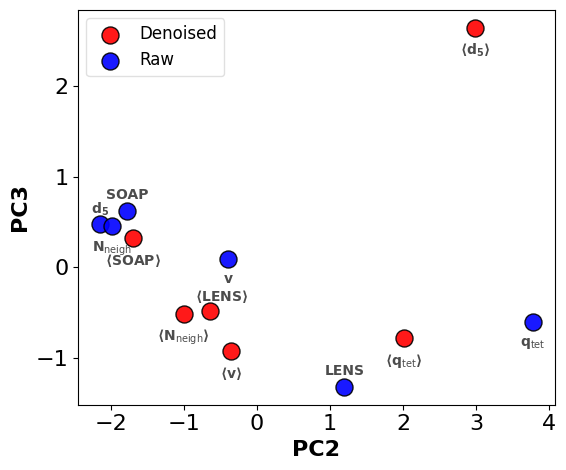

In [856]:
import numpy as np
import matplotlib.pyplot as plt

first_PC = "PC2"
second_PC = "PC3"

# Funzione per sostituire LaTeX con Unicode o rappresentazioni leggibili, rimuovere \mathbf, $, e correggere i pedici
def replace_latex_symbols(label):
    # # Rimuovi tutti i \mathbf e sostituisci i contenuti senza modifiche
    # label = label.replace(r"\mathbf{", "").replace("}", "")
    
    # # Rimuovi i simboli $ usati per delimitare il LaTeX
    # label = label.replace("$", "")
    
    # # Sostituzione di \langle e \rangle con i simboli Unicode ⟨ e ⟩, senza spazi aggiuntivi
    # label = label.replace(r"_5", "₅")
    
    return label

# Filtra i dati per "denoise" True e False
denoise_true = pca_dataset[pca_dataset['denoise'] == True]
denoise_false = pca_dataset[pca_dataset['denoise'] == False]

# Crea il grafico 2D
plt.scatter(denoise_true[first_PC], denoise_true[second_PC], color='red', edgecolor='black', s=150, label="Denoised", alpha=0.9)
plt.scatter(denoise_false[first_PC], denoise_false[second_PC], color='blue', edgecolor='black', s=150, label="Raw", alpha=0.9)

# Titoli e etichette
#plt.title("Evaluation space", fontsize=18, fontweight="bold")
plt.xlabel(first_PC, fontsize=16, fontweight="bold")
plt.ylabel(second_PC, fontsize=16, fontweight="bold")

# Aggiungi etichette a ciascun punto, leggermente più in alto
for i, row in pca_dataset.iterrows():
    label = replace_latex_symbols(i)  # Usa l'indice o una colonna specifica se preferisci
    print(label)
    # if label == r"$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$":
    #     x = 0.3
    #     y = 0.26
    # elif label == r"$\mathbf{\langle LENS \rangle}$":
    #     x = 0.05
    #     y = 0.26
    # elif label == r"$\mathbf{N_{\text{neigh}}}$":
    #     x = 0.3
    #     y = -0.1
    # elif label == r"$\mathbf{d_5}$":
    #     x = -0.2
    #     y = 0.26
    # elif label == r"$\mathbf{\langle d_5 \rangle}$":
    #     x = 0.01
    #     y = -0.11
    # else:
    #     x = 0
    #     y = 0.26
    # PC2 PC1
    # if label == r"$\mathbf{N_{\text{neigh}}}$":
    #     x = 0.5
    #     y = 0.1
    # elif label == r"$\mathbf{d_5}$":
    #     x = 0.35
    #     y = -0.02
    # elif label == r"$\mathbf{\langle SOAP \rangle}$":
    #     x = 0.15
    #     y = 0.4
    # elif label == r"$\mathbf{\langle LENS \rangle}$":
    #     x = 0.1
    #     y = -0.15
    # elif label == r"$\mathbf{\langle N_{\text{neigh}} \rangle}$":
    #     x = 0.45
    #     y = 0.4
    if label == "SOAP":
        x = 0.0
        y = 0.25
    elif label == r"$\mathbf{d_5}$":
        x = 0.0
        y = 0.25
    elif label == r"$\mathbf{\langle LENS \rangle}$":
        x = 0.15
        y = 0.25
    elif label == r"LENS":
        x = 0.0
        y = 0.25
    else:
        x = 0.0
        y = -0.15
    plt.text(row[first_PC] + x, row[second_PC] + y, label, fontsize=10, ha='center', va='top', alpha=0.7, fontweight="bold")  # Offset in y

# Configurazione della legenda a destra del grafico
plt.legend(title_fontsize=14, fontsize=12, loc='best', framealpha=0.6)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
# Mostra il grafico
#plt.grid(True, color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Assicura che il grafico non si sovrapponga alla legenda
plt.show()


In [857]:
pca_dataset
pca_dataset = pca_dataset.drop(['denoise', 'dynamical'], axis=1)

In [858]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

font = 20
cmap = 'inferno'  # Definisci cmap se non è già definito
#pca_dataset = pca_dataset.drop(columns=['Legend'])

# Calcolare la matrice delle distanze
distance_matrix = pdist(pca_dataset, metric='euclidean')
# Convertire la matrice delle distanze in formato quadrato
distance_matrix_square = squareform(distance_matrix)
distance_df = pd.DataFrame(distance_matrix_square, index=pca_dataset.index, columns=pca_dataset.index)
#distance_df = distance_df.iloc[::-1]
# distance_df = distance_df.loc[::-1,::-1]
distance_df

Filename                                          $\mathbf{\langle \mathbf{v} \rangle}$  \
Filename                                                                                  
$\mathbf{\langle \mathbf{v} \rangle}$                                          0.000000   
$\mathbf{v}$                                                                   4.894131   
$\mathbf{d_5}$                                                                 4.537543   
$\mathbf{\langle SOAP \rangle}$                                                2.618083   
$\mathbf{\langle LENS \rangle}$                                                0.679293   
$\mathbf{q_\text{tet}}$                                                        7.832106   
$\mathbf{\langle N_{\text{neigh}} \rangle}$                                    0.913596   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$                               2.499177   
SOAP                                                                           3.599889   
$\mathbf{\langle d_5 \rangle}$                                                 4.897868   
$\mathbf{N_{\text{neigh}}}$                                                    4.525761   
LENS                                                                           1.821718   

Filename                                          $\mathbf{v}$  \
Filename                                                         
$\mathbf{\langle \mathbf{v} \rangle}$                 4.894131   
$\mathbf{v}$                                          0.000000   
$\mathbf{d_5}$                                        1.993795   
$\mathbf{\langle SOAP \rangle}$                       3.194631   
$\mathbf{\langle LENS \rangle}$                       5.251583   
$\mathbf{q_\text{tet}}$                               4.621484   
$\mathbf{\langle N_{\text{neigh}} \rangle}$           4.369661   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$      4.758677   
SOAP                                                  2.371002   
$\mathbf{\langle d_5 \rangle}$                        6.611458   
$\mathbf{N_{\text{neigh}}}$                           1.805629   
LENS                                                  4.465169   

Filename                                          $\mathbf{d_5}$  \
Filename                                                           
$\mathbf{\langle \mathbf{v} \rangle}$                   4.537543   
$\mathbf{v}$                                            1.993795   
$\mathbf{d_5}$                                          0.000000   
$\mathbf{\langle SOAP \rangle}$                         2.104127   
$\mathbf{\langle LENS \rangle}$                         4.707298   
$\mathbf{q_\text{tet}}$                                 6.613080   
$\mathbf{\langle N_{\text{neigh}} \rangle}$             3.744367   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$        5.369692   
SOAP                                                    1.074349   
$\mathbf{\langle d_5 \rangle}$                          6.989958   
$\mathbf{N_{\text{neigh}}}$                             0.188805   
LENS                                                    4.881458   

Filename                                          $\mathbf{\langle SOAP \rangle}$  \
Filename                                                                            
$\mathbf{\langle \mathbf{v} \rangle}$                                    2.618083   
$\mathbf{v}$                                                             3.194631   
$\mathbf{d_5}$                                                           2.104127   
$\mathbf{\langle SOAP \rangle}$                                          0.000000   
$\mathbf{\langle LENS \rangle}$                                          2.658462   
$\mathbf{q_\text{tet}}$                                                  7.316271   
$\mathbf{\langle N_{\text{neigh}} \rangle}$                              1.750481   
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$                         4.019810 

In [859]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib

# Set line width for dendrogram lines
matplotlib.rcParams['lines.linewidth'] = 5

# Assuming distance_df and distance_matrix are already defined in your environment
# Remove 'File' from axis labels
distance_df.index = distance_df.index.str.replace('File', '')
distance_df.columns = distance_df.columns.str.replace('File', '')

# Replace diagonal values with zero
np.fill_diagonal(distance_df.values, 0)

# Calculate hierarchical clusters using agglomerative method
linked = linkage(distance_matrix, method='ward', optimal_ordering=True)

# Create a figure with additional left space for dendrogram
fig = plt.figure(figsize=(26, 15), dpi=600)

# Dendrogram with reduced width
ax1 = fig.add_axes([-0.2, 0.203, 0.35, 0.65], frame_on=False)  # Reduced width from 0.3 to 0.2
dendro = dendrogram(linked, orientation='left', labels=distance_df.index, ax=ax1)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=font + 4, fontweight='bold')
ax1.set_xticks([])  # Remove x-axis ticks
ax1.set_xticklabels([])  # Remove x-axis labels
ax1.invert_yaxis()  # Invert y-axis

# Heatmap
ax2 = fig.add_axes([0.25, 0.2, 0.5, 0.65])  # Position unchanged for heatmap
# Order the distance matrix based on dendrogram order
dendro_order = dendro['leaves']
ordered_distance_df = distance_df.iloc[dendro_order, dendro_order]

# Custom formatting function
def custom_fmt(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x:.1f}'

# Plot heatmap with colorbar on the right, slightly moved right and decreased length
sns.heatmap(
    ordered_distance_df,
    cmap='inferno',
    annot=True,
    fmt='',
    ax=ax2,
    cbar_kws={'orientation': 'vertical', 'pad': 0.07, 'fraction': 0.03, 'location': 'right'},  # Reduced fraction to decrease colorbar length
    vmin=0,
    vmax=8.5,
    annot_kws={"fontsize": font + 10, "fontweight": 'bold'}
)

# Custom formatting of annotations
for text in ax2.texts:
    text.set_text(custom_fmt(float(text.get_text()), None))
    text.set_fontweight('bold')

# Adjusting y-tick and x-tick labels
ax2.set_yticklabels([], fontsize=font, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=font + 4, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize colorbar
cbar = ax2.collections[0].colorbar
cbar.set_ticks([])  # Remove tick labels from colorbar

# Add 0 at the bottom and Max at the top of the colorbar
cbar.ax.text(0.5, -0.05, 'Min', ha='center', va='center', transform=cbar.ax.transAxes, fontsize=font + 4, fontweight='bold')
cbar.ax.text(0.5, 1.05, 'Max', ha='center', va='center', transform=cbar.ax.transAxes, fontsize=font + 4, fontweight='bold')

# Add title to colorbar
cbar.set_label('Distance', labelpad=25, fontsize=font + 6, fontweight='bold', loc='center')

# Display the plot
plt.show()


In [860]:
pca_dataset

PC1       PC2       PC3
Filename                                                                      
$\mathbf{\langle \mathbf{v} \rangle}$            -2.131139 -0.357730 -0.923731
$\mathbf{v}$                                      2.655310 -0.394448  0.096600
$\mathbf{d_5}$                                    1.793130 -2.150422  0.481852
$\mathbf{\langle SOAP \rangle}$                  -0.254507 -1.693938  0.320118
$\mathbf{\langle LENS \rangle}$                  -2.559515 -0.634777 -0.475202
$\mathbf{q_\text{tet}}$                           4.511605  3.779231 -0.605313
$\mathbf{\langle N_{\text{neigh}} \rangle}$      -1.628480 -1.001896 -0.515022
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$ -1.355271  2.013403 -0.776612
SOAP                                              0.797475 -1.771324  0.620346
$\mathbf{\langle d_5 \rangle}$                   -2.422986  2.990720  2.638827
$\mathbf{N_{\text{neigh}}}$                       1.864063 -1.977790  0.453324
LENS                                             -1.269687  1.198971 -1.315187

$v$) Euclidean distance: 4.9
$d_5$) Euclidean distance: 7.0
SOAP) Euclidean distance: 1.1
LENS) Euclidean distance: 2.4
$q_{\text{tet}}$) Euclidean distance: 6.1
$N_{\text{neigh}}$) Euclidean distance: 3.8


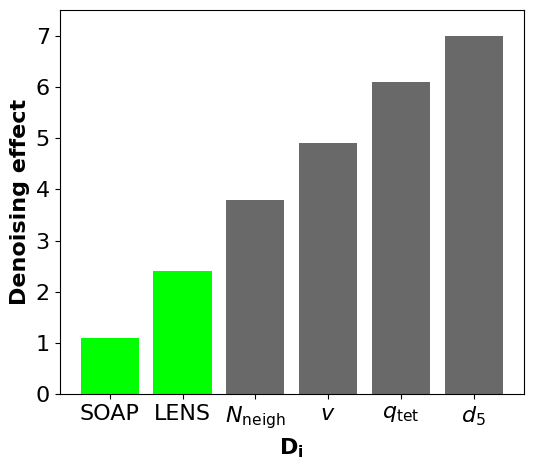

In [861]:
list_of_des = [r"$v$", r"$d_5$", "SOAP", "LENS", r"$q_{\text{tet}}$", r"$N_{\text{neigh}}$"]
list_of_dist = [[0,1],[2,9],[3,8],[4,11],[5,7],[6,10]]
dist = []
a = 0
for d in list_of_dist:
    row1 = pca_dataset.iloc[d[0]].to_numpy()
    row2 = pca_dataset.iloc[d[1]].to_numpy()
    distance = np.linalg.norm(row1 - row2)
    distance = np.round(distance,1)
    print(f"{list_of_des[a]}) Euclidean distance:", distance)
    dist.append(distance)
    a += 1

# Sorting distances and descriptors together
sorted_dist, sorted_des = zip(*sorted(zip(dist, list_of_des)))

# Creating the histogram with specific colors for "LENS" and "SOAP"
#plt.figure(figsize=(8, 6))
colors = ["lime" if descriptor in ["SOAP", "LENS"] else "dimgray" for descriptor in sorted_des]
bars = plt.bar(sorted_des, sorted_dist, width=0.8, color=colors)  # Adjusted colors

# Labels and title
plt.xlabel(r"$\mathbf{D_i}$", fontweight='bold', fontsize=16)
plt.ylabel("Denoising effect", fontweight='bold', fontsize=16)
#plt.title("Denoising effect for each descriptor", fontweight='bold', fontsize=14)

# Adjusting y-axis limits and tick parameter
plt.ylim([0, 7.5])
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


In [862]:
filtered_raw_dataset = pca_dataset[~pca_dataset.index.str.endswith(r'\rangle}$')]
filtered_raw_dataset

PC1       PC2       PC3
Filename                                                 
$\mathbf{v}$                 2.655310 -0.394448  0.096600
$\mathbf{d_5}$               1.793130 -2.150422  0.481852
$\mathbf{q_\text{tet}}$      4.511605  3.779231 -0.605313
SOAP                         0.797475 -1.771324  0.620346
$\mathbf{N_{\text{neigh}}}$  1.864063 -1.977790  0.453324
LENS                        -1.269687  1.198971 -1.315187

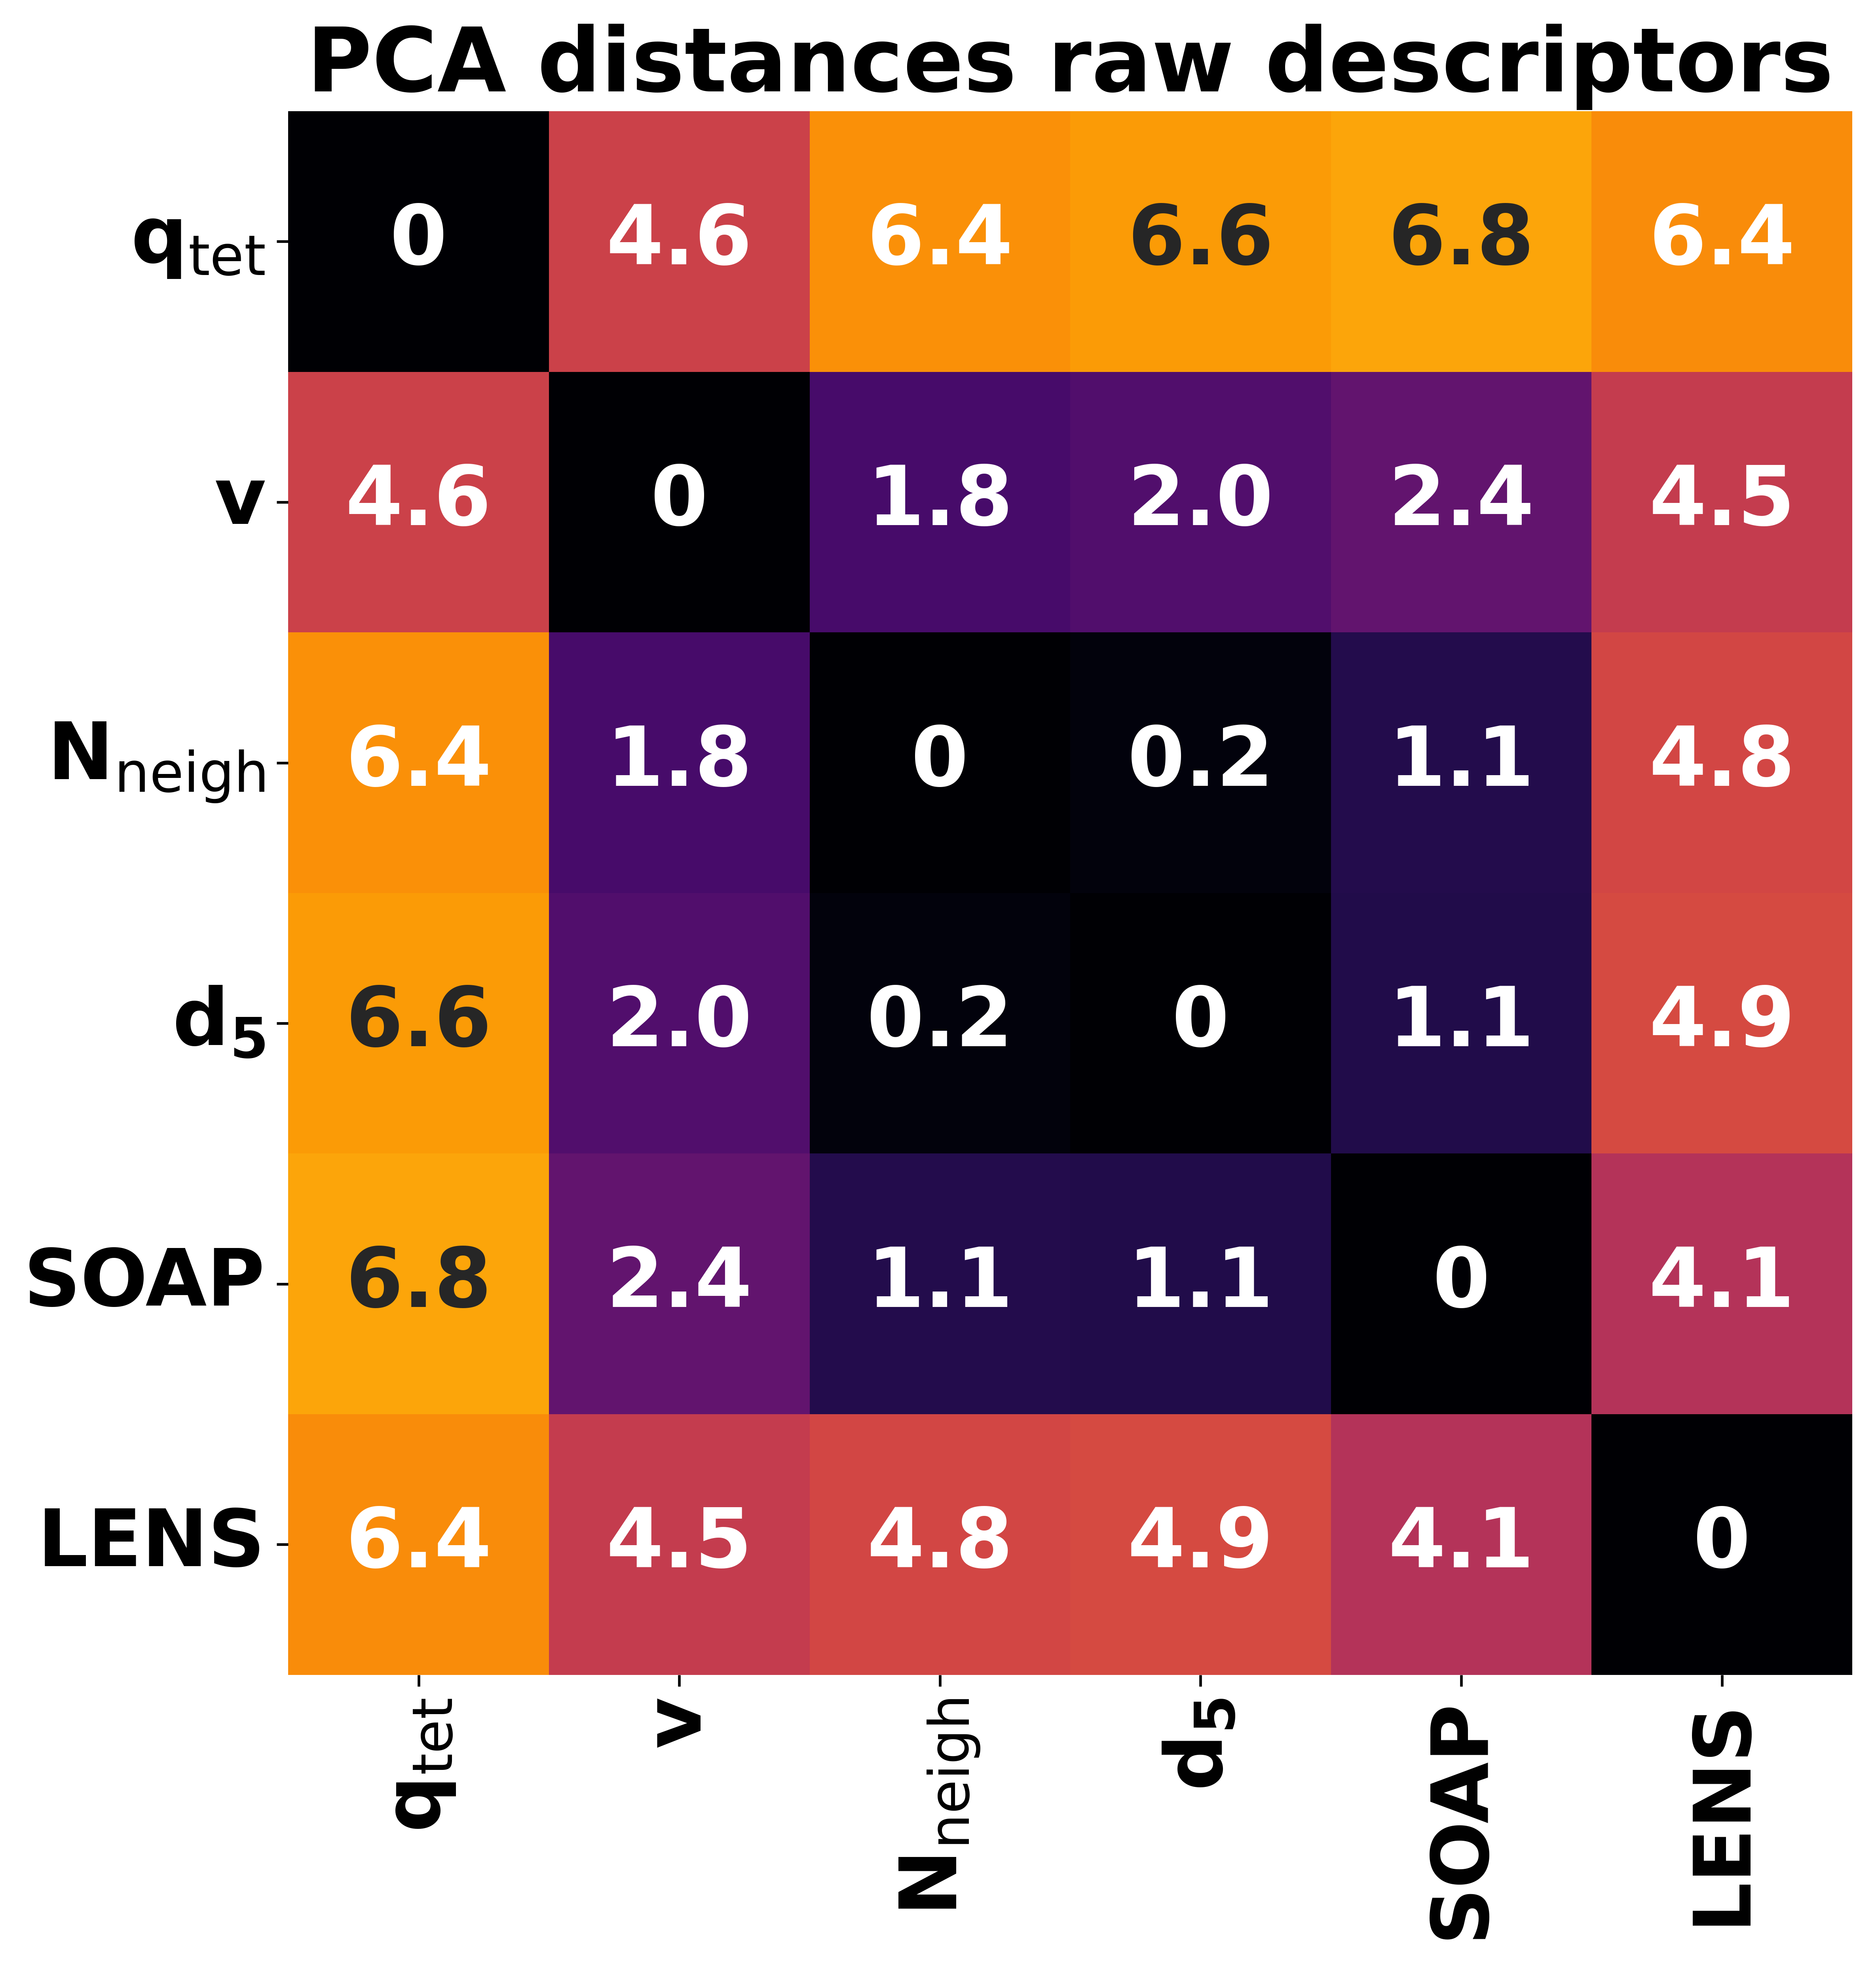

In [863]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

font = 20

# Supponendo che 'filtered_raw_dataset' sia già definito e pre-processato

# Calcolare la matrice delle distanze
distance_matrix = pdist(filtered_raw_dataset, metric='euclidean')

# Convertire la matrice delle distanze in formato quadrato
distance_matrix_square = squareform(distance_matrix)

# Creare un DataFrame per la matrice delle distanze
distance_df = pd.DataFrame(distance_matrix_square, index=filtered_raw_dataset.index, columns=filtered_raw_dataset.index)

# Rimuovere la scritta 'File' dagli assi
distance_df.index = distance_df.index.str.replace('File', '')
distance_df.columns = distance_df.columns.str.replace('File', '')

# Calcolare i cluster gerarchici utilizzando il metodo agglomerativo
linked = linkage(distance_matrix, method='ward', optimal_ordering=True)

# Ordinare la matrice delle distanze in base all'ordine del dendrogramma
dendro_order = dendrogram(linked, no_plot=True)['leaves']
ordered_distance_df = distance_df.iloc[dendro_order, dendro_order]

# Sostituire i valori della diagonale con zeri interi
np.fill_diagonal(ordered_distance_df.values, 0)

# Creare una funzione di formattazione personalizzata
def custom_fmt(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x:.1f}'

# Creare una figura per la heatmap
fig, ax = plt.subplots(figsize=(8, 8), dpi=600)

# Heatmap
sns.heatmap(
    ordered_distance_df, 
    cmap="inferno",  # Assicurati di aver definito la variabile 'cmap'
    annot=True, 
    fmt='', 
    ax=ax, 
    cbar=False,
    vmin=0,
    vmax=8.5,
    annot_kws={"fontsize": font+5, "fontweight": 'bold'}  # Aumentare la dimensione del font delle annotazioni e mettere in grassetto
)

# Formattare i testi della heatmap
for text in ax.texts:
    text.set_text(custom_fmt(float(text.get_text()), None))
    text.set_fontweight('bold')  # Mettere in grassetto le annotazioni

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=font+4, fontweight='bold')  # Aumentare la dimensione del font delle etichette dell'asse y e mettere in grassetto
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font+4, fontweight='bold')  # Aumentare la dimensione del font delle etichette dell'asse x e mettere in grassetto
ax.set_xlabel('')  # Rimuovere il label dell'asse x
ax.set_ylabel('')  # Rimuovere il label dell'asse y

plt.tight_layout()
plt.title("PCA distances raw descriptors", fontsize=font + 7, fontweight='bold')  # Mettere in grassetto il titolo
plt.show()

In [864]:
filtered_sp_dataset = pca_dataset[pca_dataset.index.str.endswith(r'\rangle}$')]
#filtered_sp_dataset.index = filtered_sp_dataset.index.str[:-10]
filtered_sp_dataset

PC1       PC2       PC3
Filename                                                                      
$\mathbf{\langle \mathbf{v} \rangle}$            -2.131139 -0.357730 -0.923731
$\mathbf{\langle SOAP \rangle}$                  -0.254507 -1.693938  0.320118
$\mathbf{\langle LENS \rangle}$                  -2.559515 -0.634777 -0.475202
$\mathbf{\langle N_{\text{neigh}} \rangle}$      -1.628480 -1.001896 -0.515022
$\mathbf{\langle \mathbf{q_\text{tet}} \rangle}$ -1.355271  2.013403 -0.776612
$\mathbf{\langle d_5 \rangle}$                   -2.422986  2.990720  2.638827

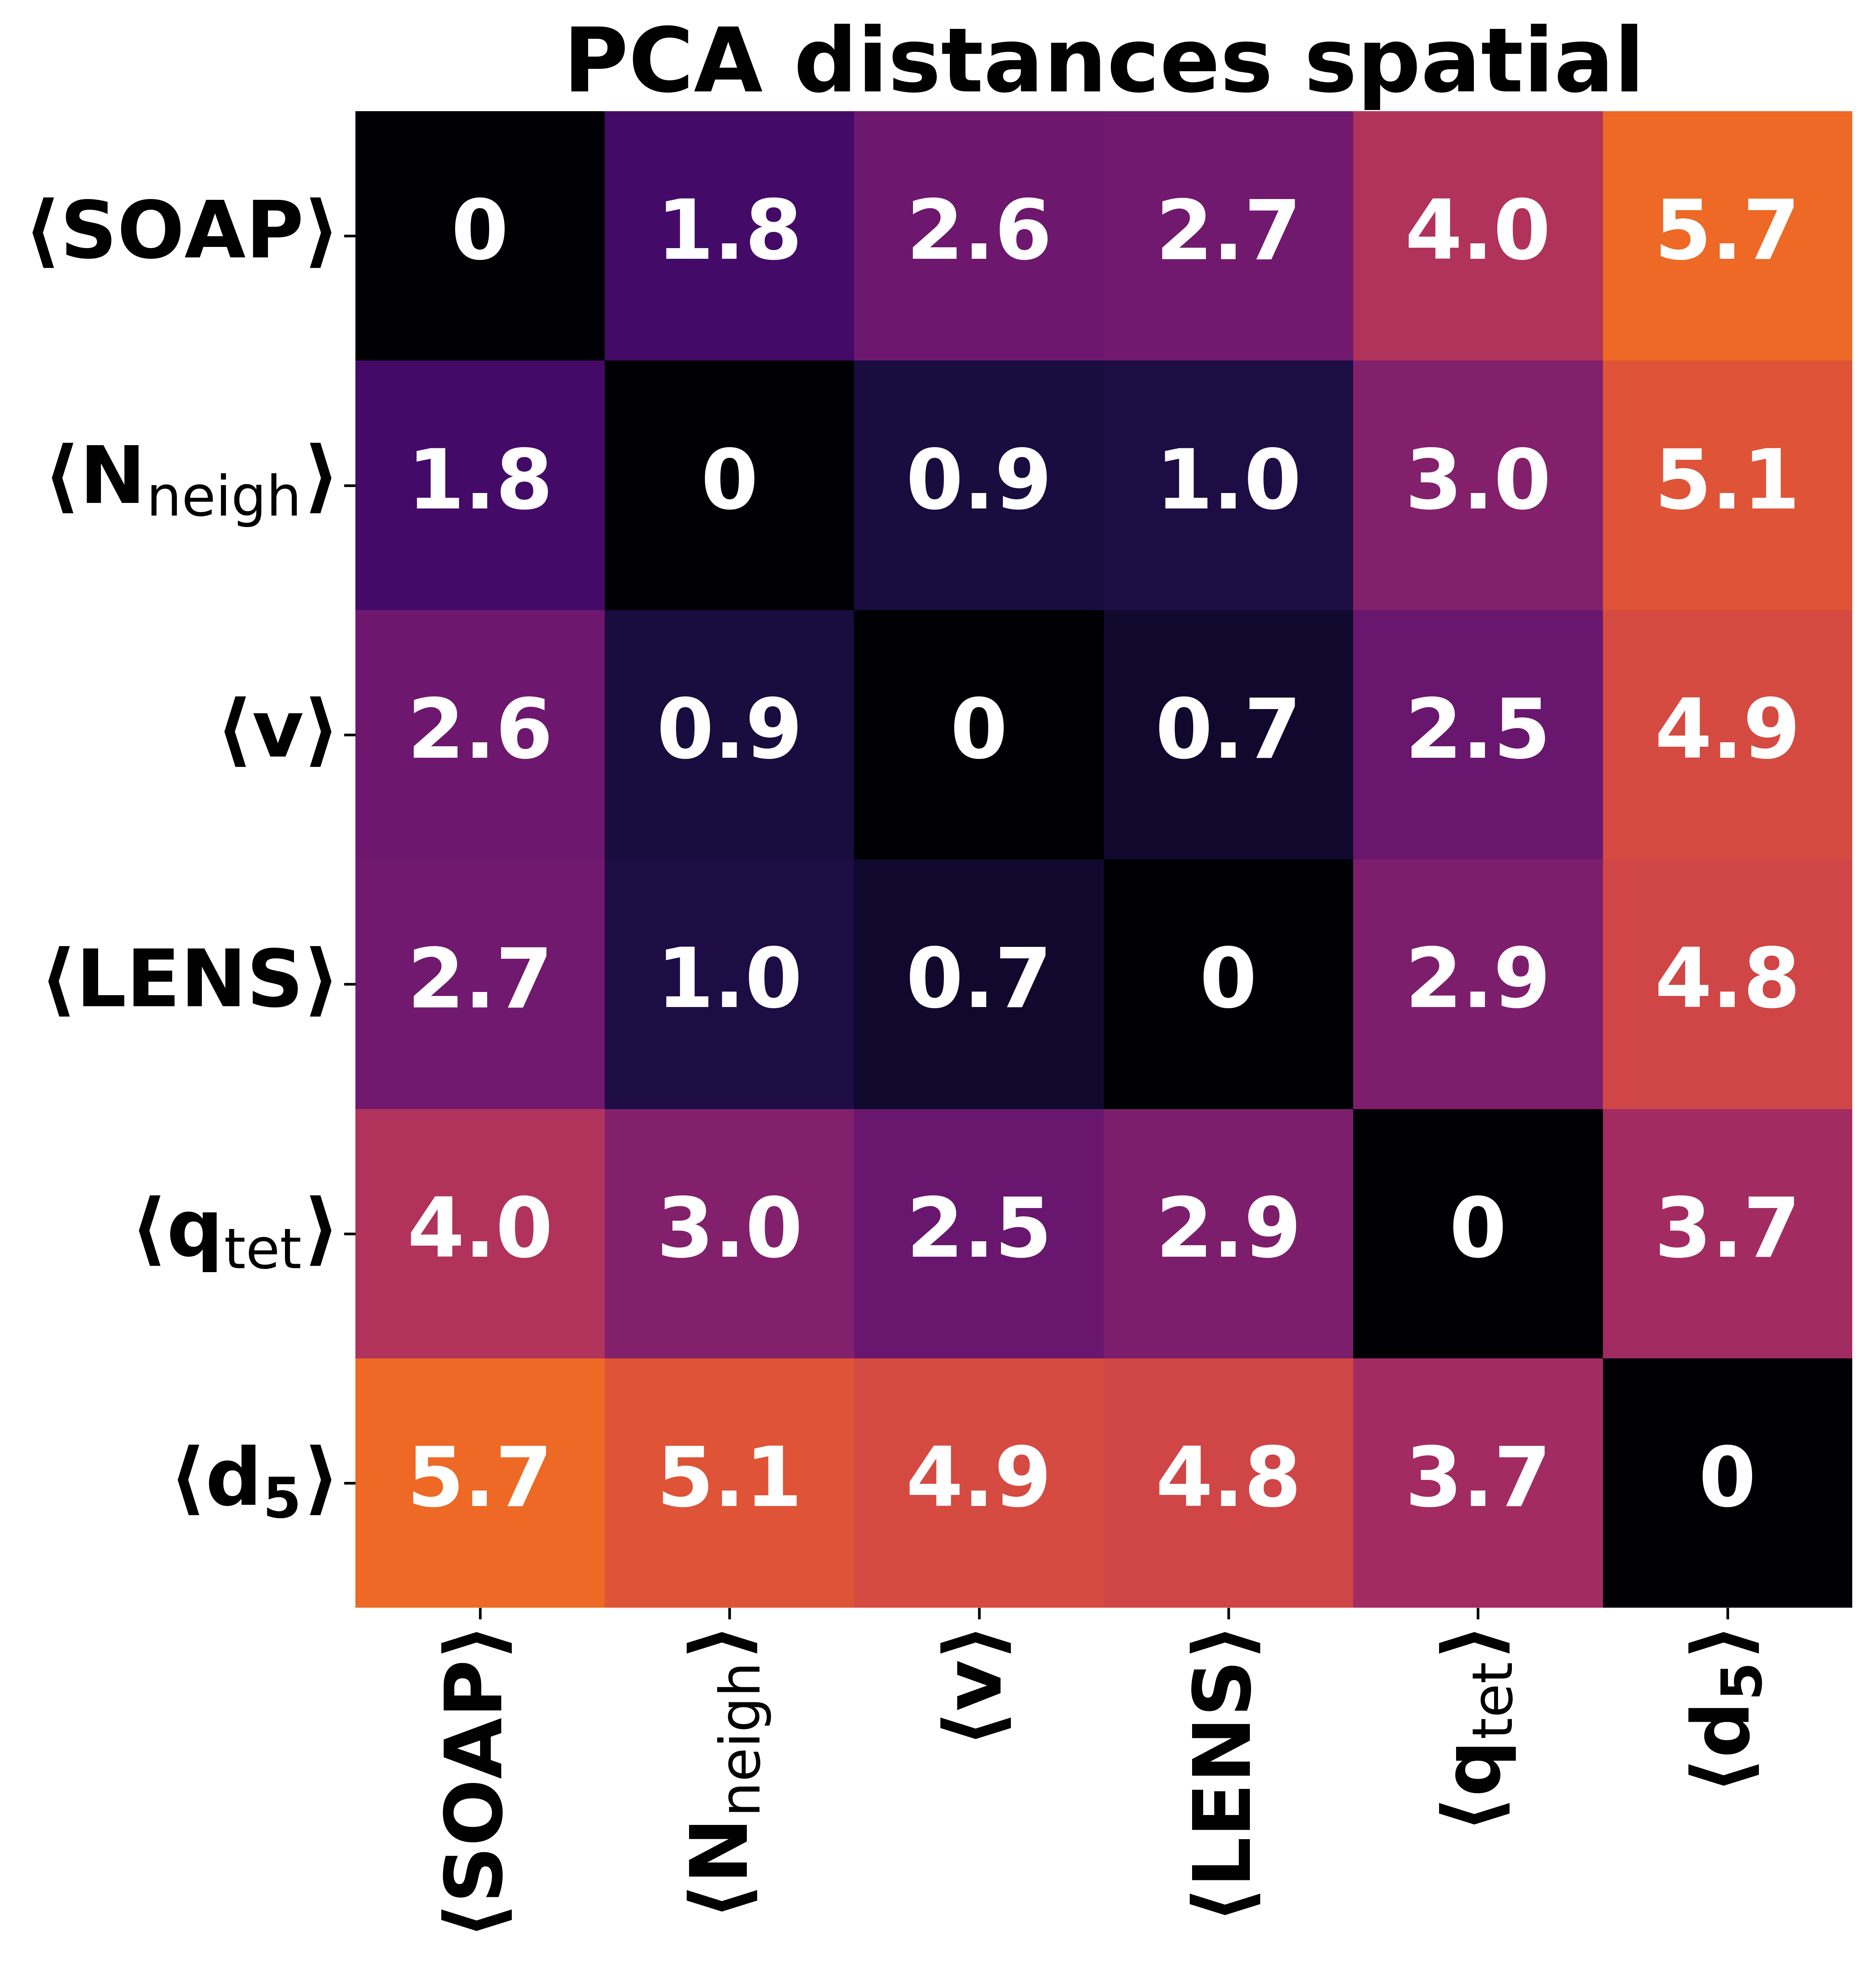

In [865]:
font = 20

# Supponendo che 'filtered_sp_dataset' sia già definito e pre-processato

# Calcolare la matrice delle distanze
distance_matrix = pdist(filtered_sp_dataset, metric='euclidean')

# Convertire la matrice delle distanze in formato quadrato
distance_matrix_square = squareform(distance_matrix)

# Creare un DataFrame per la matrice delle distanze
distance_df = pd.DataFrame(distance_matrix_square, index=filtered_sp_dataset.index, columns=filtered_sp_dataset.index)

# Rimuovere la scritta 'File' dagli assi
distance_df.index = distance_df.index.str.replace('File', '')
distance_df.columns = distance_df.columns.str.replace('File', '')

# Calcolare i cluster gerarchici utilizzando il metodo agglomerativo
linked = linkage(distance_matrix, method='ward', optimal_ordering=True)

# Ordinare la matrice delle distanze in base all'ordine del dendrogramma
dendro_order = dendrogram(linked, no_plot=True)['leaves']
ordered_distance_df = distance_df.iloc[dendro_order, dendro_order]

# Sostituire i valori della diagonale con zeri interi
np.fill_diagonal(ordered_distance_df.values, 0)

# Creare una funzione di formattazione personalizzata
def custom_fmt(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x:.1f}'

# Creare una figura per la heatmap
fig, ax = plt.subplots(figsize=(8, 8), dpi=600)

# Heatmap
sns.heatmap(
    ordered_distance_df, 
    cmap="inferno",  # Assicurati di aver definito la variabile 'cmap'
    annot=True, 
    fmt='', 
    ax=ax, 
    cbar=False,
    vmin=0,
    vmax=8.5,
    annot_kws={"fontsize": font+5, "fontweight": 'bold'}  # Aumentare la dimensione del font delle annotazioni e mettere in grassetto
)

# Formattare i testi della heatmap
for text in ax.texts:
    text.set_text(custom_fmt(float(text.get_text()), None))
    text.set_fontweight('bold')  # Mettere in grassetto le annotazioni

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=font+4, fontweight='bold')  # Aumentare la dimensione del font delle etichette dell'asse y e mettere in grassetto
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font+4, fontweight='bold')  # Aumentare la dimensione del font delle etichette dell'asse x e mettere in grassetto
ax.set_xlabel('')  # Rimuovere il label dell'asse x
ax.set_ylabel('')  # Rimuovere il label dell'asse y

plt.tight_layout()
plt.title("PCA distances spatial", fontsize=font + 7, fontweight='bold')  # Mettere in grassetto il titolo
plt.show()